In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [4]:
df["class_value"] = df["class"].map({
    "Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2
})
df

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


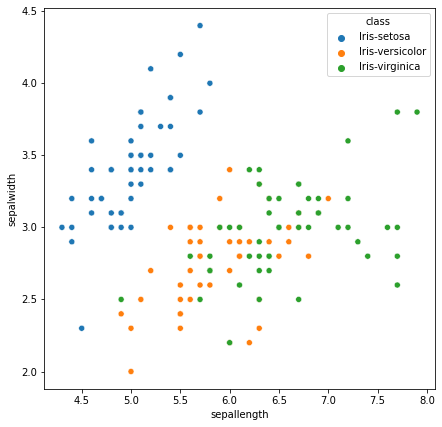

In [5]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class");

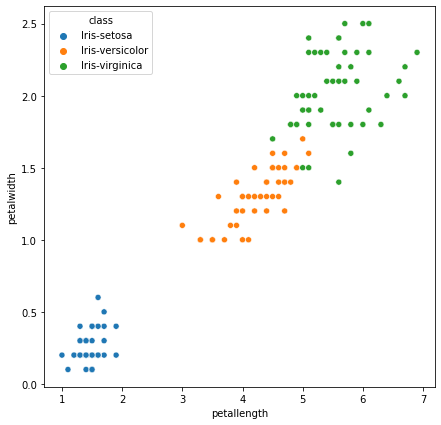

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class");

<AxesSubplot:>

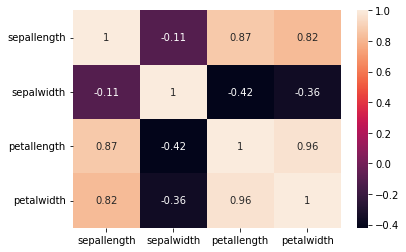

In [9]:
# badanie korelacji cech zm. niezależnej
sns.heatmap( df.iloc[:, :4].corr() , annot=True)

In [10]:
!pip install mlxtend
!pip install dtreeplt

In [11]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [26]:
#X = df[ ["sepallength","sepalwidth"] ]
X = df[ ["petallength","petalwidth"] ]
y = df.class_value

In [33]:
model = DecisionTreeClassifier(max_depth=11, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(max_depth=11, random_state=0)

<AxesSubplot:>

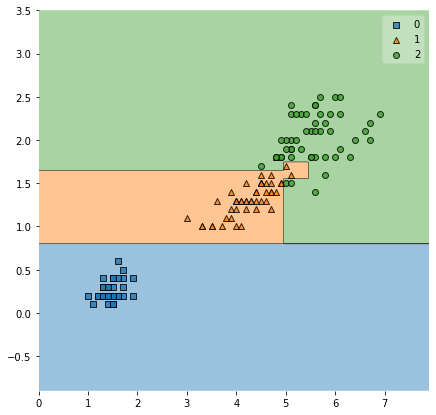

In [34]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

C:\Users\kurs\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


<Figure size 1008x576 with 0 Axes>

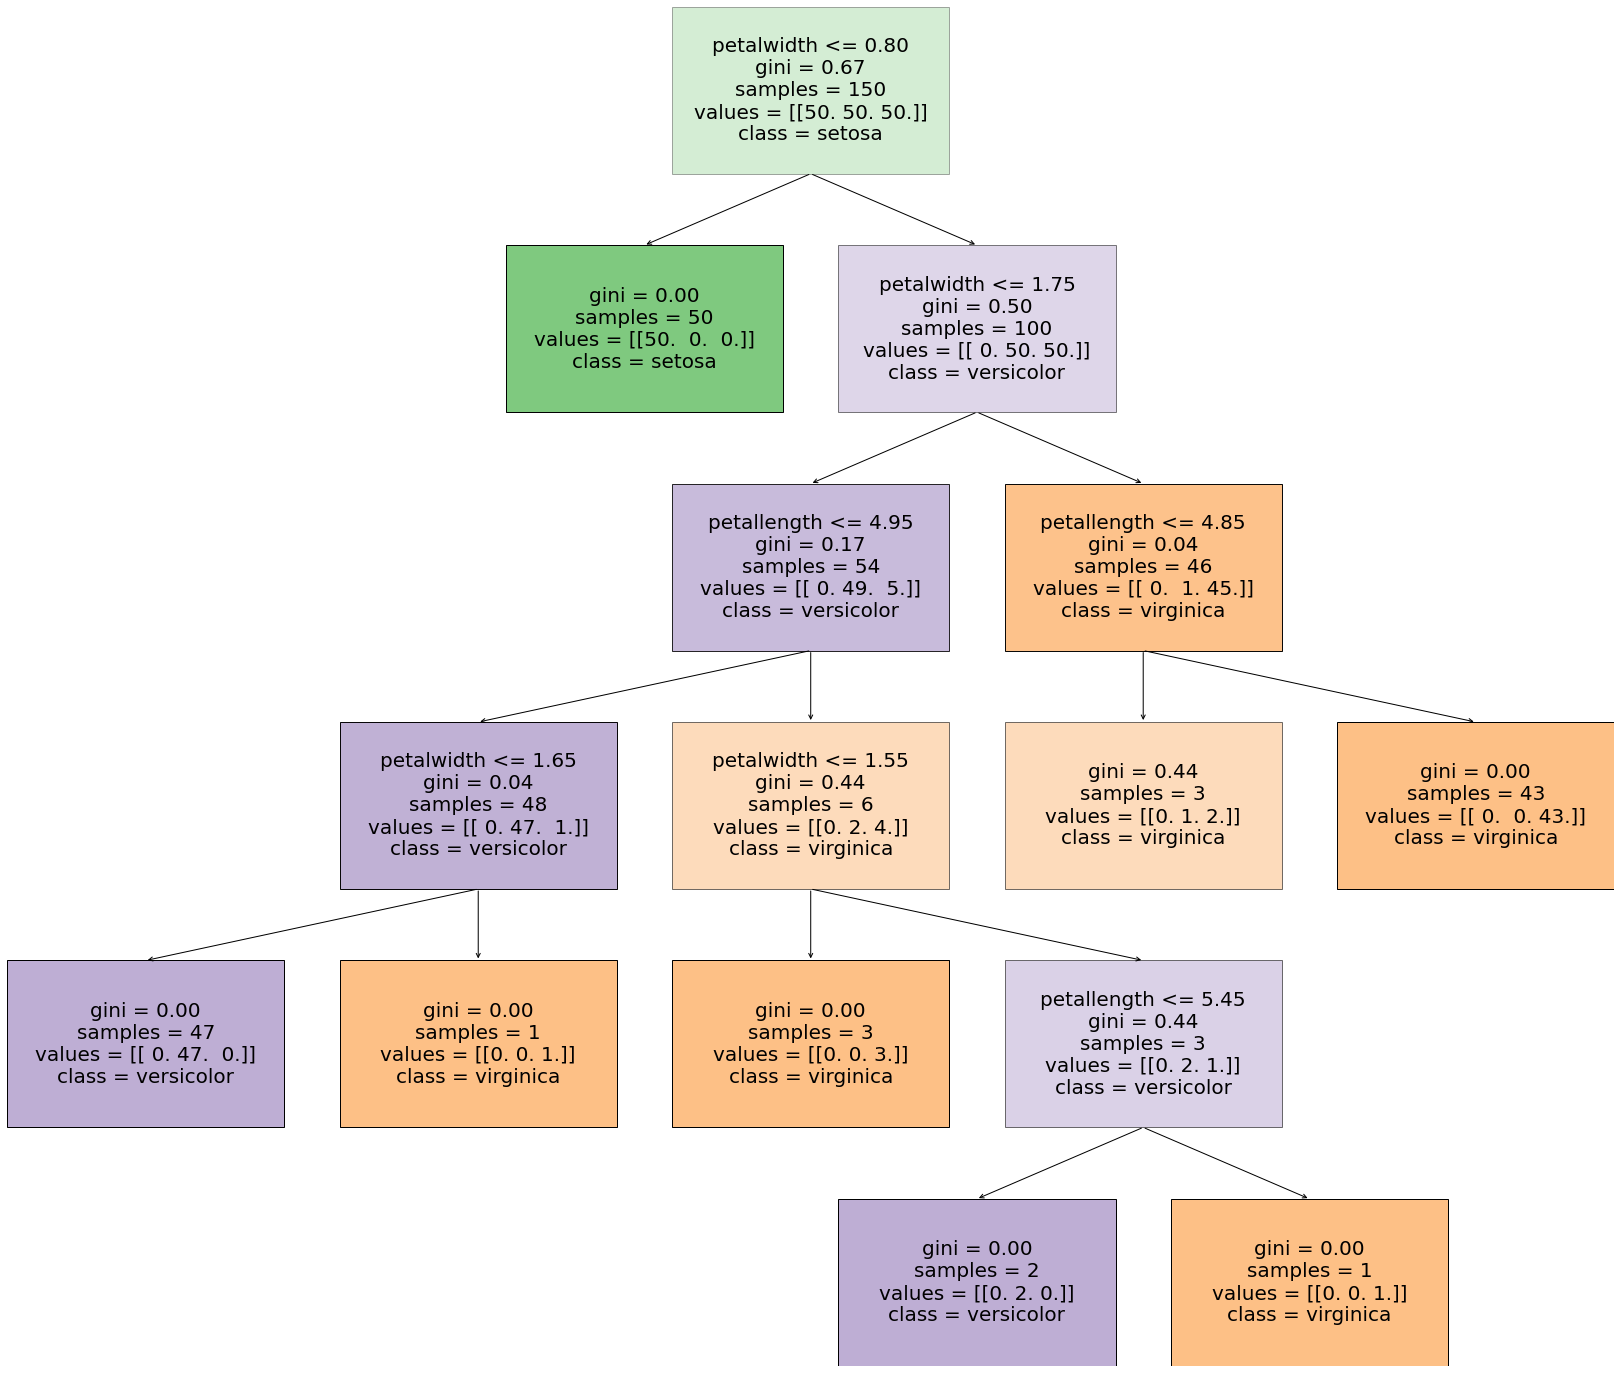

In [35]:
plt.figure(figsize=(14,8))
dtreeplt(model, feature_names=X.columns, target_names=["setosa","versicolor","virginica"]).view();
plt.savefig("dt.png", dpi=150)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [45]:
# Porównanie z regresją logistyczną
df = pd.read_csv("cukrzyca.csv")

X = df.iloc[:, :-1]
y = df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)
print("TEST",model.score(X_test, y_test))
print("TRAIN",model.score(X_train, y_train))

y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

TEST 0.8571428571428571
TRAIN 0.9250814332247557


,0,1
0,181,32
1,12,83


In [51]:
pd.DataFrame( model.feature_importances_ , index=X.columns).sort_values(0, ascending=False)

,0
glucose,0.335413
bmi,0.192348
diabetespedigreefunction,0.130975
age,0.120578
insulin,0.115898
bloodpressure,0.055297
pregnancies,0.031259
skinthickness,0.018233


In [47]:
# Porównanie z regresją logistyczną
df = pd.read_csv("cukrzyca.csv")

X = df.iloc[:, :-1]
y = df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)
print("TEST",model.score(X_test, y_test))
print("TRAIN",model.score(X_train, y_train))

y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148.0,72.0,35.000000,155.102302,33.6,0.627,50.0
1,1,85.0,66.0,29.000000,155.102302,26.6,0.351,31.0
2,8,183.0,64.0,29.109665,155.102302,23.3,0.672,32.0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
1532,2,122.0,70.0,27.000000,155.102302,36.8,0.340,27.0
1533,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
1534,1,126.0,60.0,29.109665,155.102302,30.1,0.349,47.0
